In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset/PredictClosedStackOverflowQuestions.csv')

In [ ]:
data

In [ ]:
extra=data['PostClosedDate']

In [ ]:
labels=data['OpenStatus']

In [ ]:
data.drop(columns=['PostId','PostCreationDate','OwnerUserId','OwnerCreationDate','OwnerUndeletedAnswerCountAtPostTime','Tag2','Tag3','Tag4','Tag5'],inplace=True)

In [ ]:
data.drop(columns=['OpenStatus'],inplace=True)

In [ ]:
data

,ReputationAtPostCreation,Title,BodyMarkdown,Tag1,PostClosedDate
0,1,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN
1,192,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,NaN
2,1,Too many lookup tables,What are the adverse effects of having too man...,sql-server,NaN
3,4,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,04/15/2012 21:12:48
4,334,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,NaN
...,...,...,...,...,...
140267,520,Is it possible to implement bitwise operators ...,I am facing a rather peculiar problem. I am wo...,bitwise-operators,NaN
140268,1,Ruby on Rails: MySql Gem does not work: uninit...,I have the following installed:\r\nMac Os 10.7...,mysql,NaN
140269,4,deleting image from image folder,I am working with an asp.net application.I wan...,asp.net,05/21/2012 21:21:27
140270,1,Need help making HTML's,Hi to all the gurus out there.\r\n\r\nAnybody ...,html,10/22/2010 13:10:28


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
x_scaled = min_max_scaler.fit_transform(data[['ReputationAtPostCreation']])
df = pd.DataFrame(x_scaled)

In [ ]:
data.drop(columns=['ReputationAtPostCreation'],inplace=True)

In [ ]:
import re

In [ ]:
def preprocess(w):
  w=w.lower()
  w=w.replace('\r','')
  w=w.replace('\n','')
  w=re.sub(r"([?.!,%&^%$#@])",r" ",w)
  w=re.sub(r'[" "]+'," ",w)
  w=re.sub(r"[^a-zA-Z?.!,]+"," ",w)
 # w=w.strip()
  w=w+'[cls]'
  return w

In [ ]:
ddata=list(map(lambda x:preprocess(x),data['BodyMarkdown']))

In [ ]:
def preprocess1(w):
  w=w.lower()
#  w=w.replace('\r','')
#  w=w.replace('\n','')
#  w=re.sub(r"([?.!,%&^%$#@])",r" ",w)
# w=re.sub(r'[" "]+'," ",w)
  w=re.sub(r"[^a-zA-Z?.!,]+"," ",w)
 # w=w.strip()
 # w=w+'[cls]'
  return w

In [ ]:
dataa=list(map(lambda x:preprocess1(x),data['Title']))

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer=Tokenizer(num_words=30000)
tokenizer.fit_on_texts(ddata)
sequences=tokenizer.texts_to_sequences(ddata)
word_index=tokenizer.word_index

In [ ]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(dataa)
sequences2=tokenizer.texts_to_sequences(dataa)
word_index=tokenizer.word_index

In [ ]:
data1=pad_sequences(sequences,maxlen=256,padding='post')
data2=pad_sequences(sequences2,maxlen=256,padding='post')

In [ ]:
from sklearn import preprocessing

In [ ]:
new_df=data.fillna({'PostClosedDate':0},inplace=True)

In [ ]:
aa=list(data['PostClosedDate'])

In [ ]:
bb=[]
for i in aa:
  if i==0:
    bb.append(0)
  else:
    bb.append(1)

In [ ]:
labels=bb

In [ ]:
def modell():
  inputs=[tf.keras.layers.Input(shape=(256,),dtype=tf.int32,name='i1'),tf.keras.layers.Input(shape=(256),dtype=tf.int32,name='i2'),tf.keras.layers.Input(shape=(1,),dtype=tf.int32,name='i3')]
  x1=tf.keras.layers.Embedding(30000, 256)(inputs[0])
  x2=tf.keras.layers.Embedding(10000,256)(inputs[1])
  x3=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True))(x1)
  x4=tf.keras.layers.LSTM(128)(x3)
  y1=tf.keras.layers.Dense(128,activation='relu')(x4)
  x5=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True))(x2)
  x6=tf.keras.layers.LSTM(128)(x5)
  y2=tf.keras.layers.Dense(128,activation='relu')(x6)
  x7=tf.keras.layers.Dense(128,activation='relu')(inputs[2])
#  x8=tf.keras.layers.Flatten()(x4)
#  x9=tf.keras.layers.Flatten()(x6)
  x10=tf.keras.layers.concatenate([y1,y2,x7])
  x11=tf.keras.layers.Dense(128,activation='relu')(x10)
  x12=tf.keras.layers.Dense(1,activation='sigmoid')(x11)
  model1=tf.keras.models.Model(inputs=inputs,outputs=x12)
  return model1

In [ ]:

model=modell()

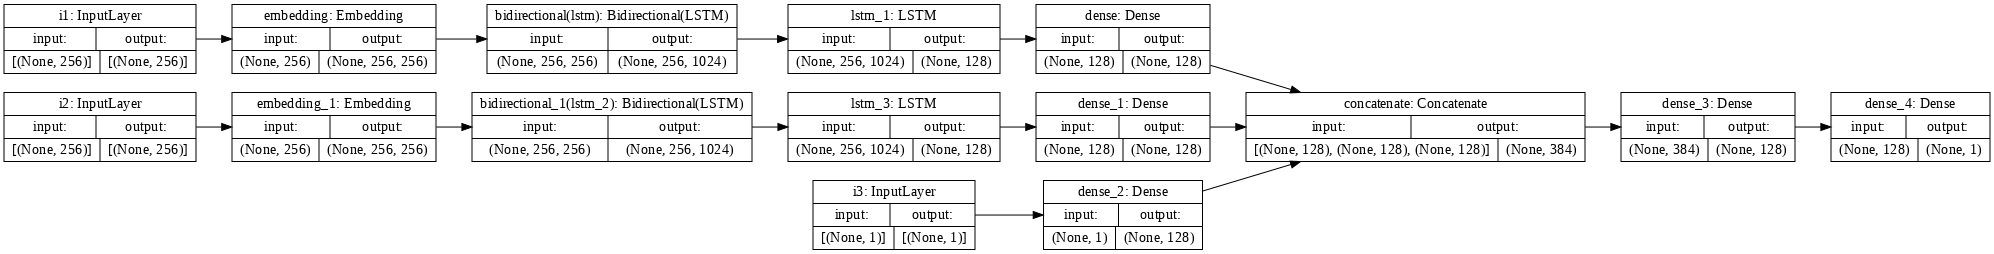

In [ ]:
tf.keras.utils.plot_model(model = model , rankdir="LR", dpi=72, show_shapes=True)

In [ ]:
data11=data1[:30000]
data22=data2[:30000]
x_scaled2=x_scaled[:30000]

In [ ]:
data11.shape

(120000, 256)

In [ ]:
data22

array([[   6,  789,    9, ...,    0,    0,    0],
       [   4,    1,  241, ...,    0,    0,    0],
       [ 633,  231, 1652, ...,    0,    0,    0],
       ...,
       [  13, 1973,  419, ...,    0,    0,    0],
       [ 163, 1516,  102, ...,    0,    0,    0],
       [ 643,   11, 1754, ...,    0,    0,    0]], dtype=int32)

In [ ]:
x_scaled

array([[-0.99966613],
       [-0.99784418],
       [-0.99966613],
       ...,
       [-0.99963752],
       [-0.99966613],
       [-0.99964706]])

In [ ]:
data111=data1[120000:]
data222=data2[120000:]
x_scaled3=x_scaled[120000:]

In [ ]:
data11.shape



(120000, 256)

In [ ]:
data22.shape

(120000, 256)

In [ ]:
x_scaled2.shape

(120000, 1)

In [ ]:
len(labels)

140272

In [ ]:
labels1=labels[:30000]
labels2=labels[120000:]

In [ ]:
len

In [ ]:
len(labels2)

20272

In [ ]:
data222.shape

(20272, 256)

In [ ]:
labelss=np.array(labels1)

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(x=[data11,data22,x_scaled2],y=labelss,epochs=3,batch_size=16)

Epoch 1/3
1875/1875 [==============================] - 362s 190ms/step - loss: 0.6891 - accuracy: 0.5200
Epoch 2/3
1875/1875 [==============================] - 354s 189ms/step - loss: 0.6892 - accuracy: 0.5198
Epoch 3/3
1875/1875 [==============================] - 354s 189ms/step - loss: 0.6877 - accuracy: 0.5160


In [ ]:
,validation_data=([data111,data222,x_scaled3]
                  ,labels2)